In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


importowanie zestawu obrazów ZALANDO: Fashion MNIST

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
print(train_labels)

[9 0 0 ... 3 0 5]


Wstępne przetwarzanie danych

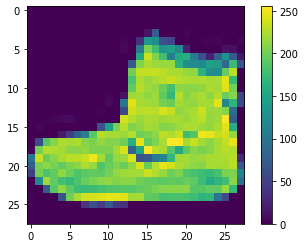

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images/255.0
test_images = test_images/255.0

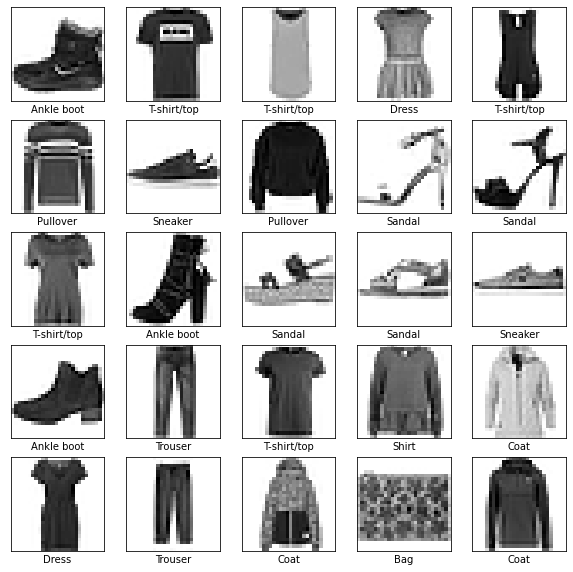

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Budowa modelu sieci

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
#kompilacja modelu
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
#trenowanie modelu
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5029 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3816 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3434 - accuracy: 0.8746
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3192 - accuracy: 0.8834
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2995 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2851 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2710 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2592 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2503 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.242

In [14]:
#ocena dokładności modelu - ewaluacja
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)
print(f"\nTest dokładności: {test_acc}, strata: {test_loss}")

313/313 - 0s - loss: 0.3530 - accuracy: 0.8758 - 459ms/epoch - 1ms/step

Test dokładności: 0.8758000135421753, strata: 0.3529879152774811


In [15]:
#Prognozowanie

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [16]:
print(predictions[0])

[7.2821052e-08 1.0608666e-07 8.2957580e-10 3.4798311e-09 6.7312214e-09
 1.5841359e-04 1.0080871e-08 4.0493533e-03 2.4737551e-07 9.9579179e-01]


In [17]:
np.argmax(predictions[0])

9

In [18]:
def plot_image(i,predictions_array,true_label,img):
    true_label,img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label= np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

In [19]:
def plot_value_array(i,predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

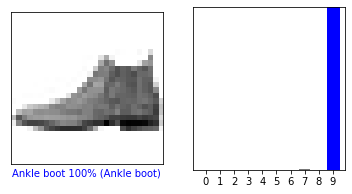

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i], test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

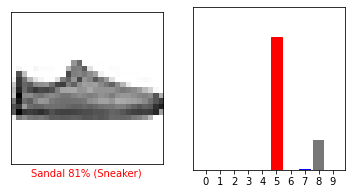

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i], test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

zbuduj wizualizację rozwiązania zawierającą pierwsze 15 obrazów ze zbioru testowego (poukłdanych w 5 wierszach i 3 kolumnach)
gdzie każda jednostka będzie składała się z obrazu podpisanego etykietą z opisem prawdopodobieństwa znalezienia 
właściwego rozwiązania i kolor niebieski - trafne, czerwony - nietrafne
dodatkowo ulokuj po prawej stronie każdego obrazka wykres słupkowy przedstawiający prawdopodobieństwa wystąpienia 

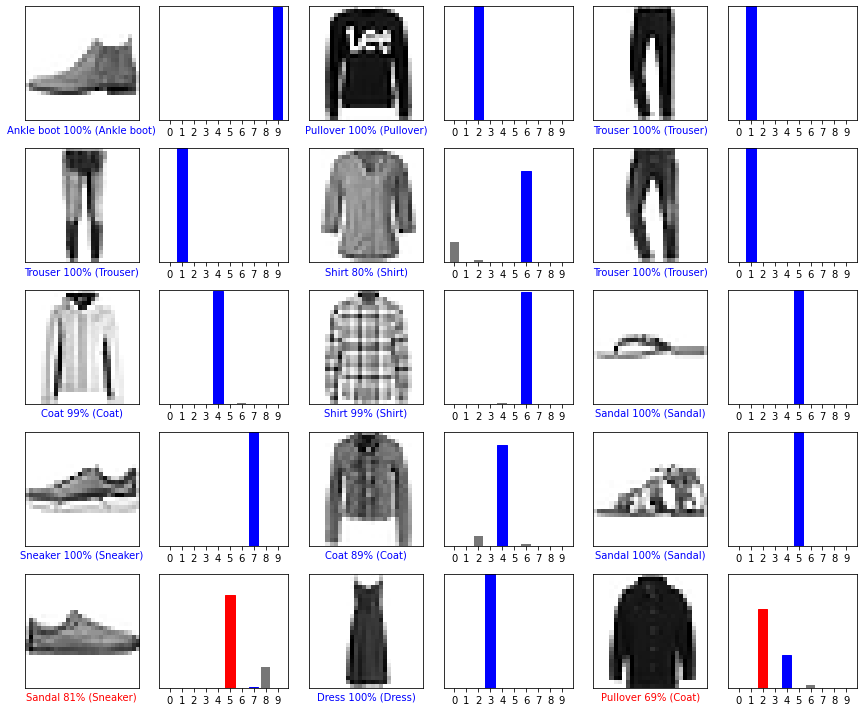

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

Użycie wyszkolonego modelu do predykcji

In [25]:
img = test_images[1]
print(img.shape)

(28, 28)


In [26]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.1883768e-05 4.9384414e-16 9.9987471e-01 8.2653307e-13 6.7718160e-05
  2.5423658e-14 4.5691584e-05 4.6208490e-24 3.3032344e-13 5.0475036e-14]]


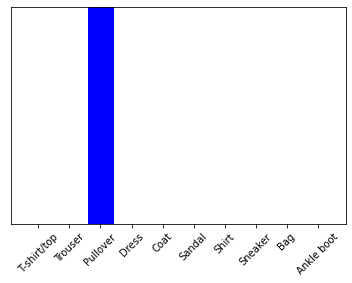

In [28]:
plot_value_array(1,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)
plt.show()